In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import numpy as np
import healpy as hp

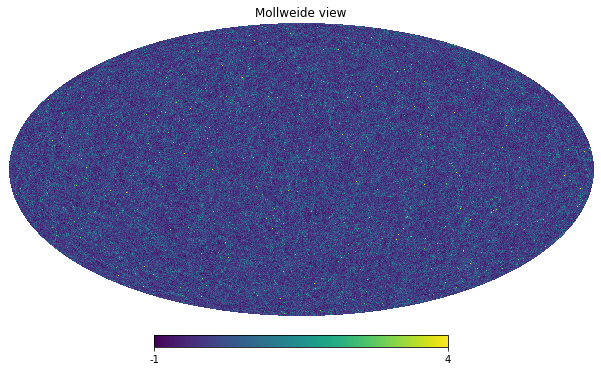

In [3]:
overdensity = hp.read_map("MAPS/overdensity_NS_2048_R_1024_P_1024_DV_1.fits")
hp.mollview(overdensity,xsize=6400, max=4)

In [4]:
psO = hp.sphtfunc.anafast(overdensity)

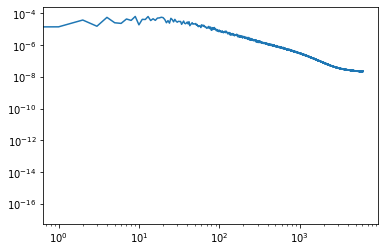

In [5]:
plt.loglog(psO);

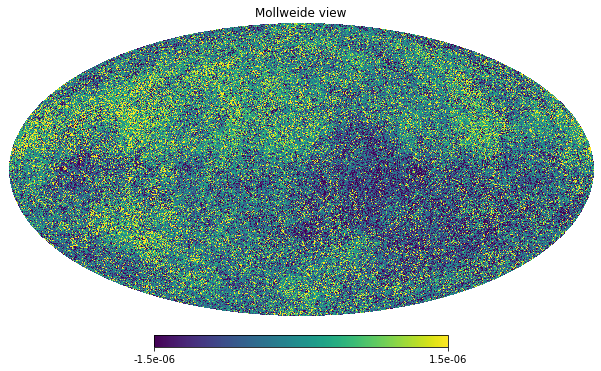

In [6]:
kSZ = hp.read_map("MAPS/kSZ_NS_2048_R_1024_P_1024_DV_1.fits")
hp.mollview(kSZ,xsize=6400, min=-1.5*10**-6,max=1.5*10**-6)

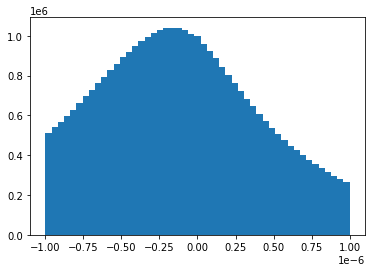

In [7]:
plt.hist(kSZ,bins = np.linspace(-1*10**-6,1*10**-6));

In [8]:
pskSZ = hp.sphtfunc.anafast(kSZ)

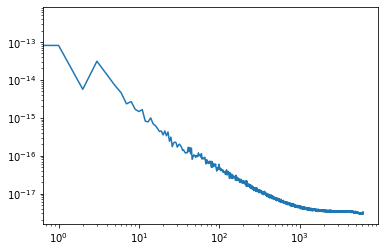

In [9]:
plt.loglog(pskSZ);

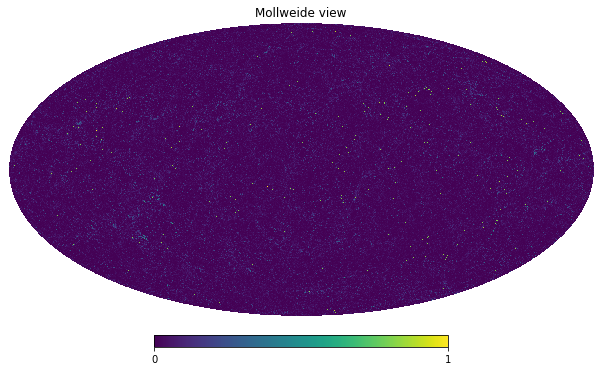

In [25]:
convergence = hp.read_map("MAPS/convergence_NS_2048_R_512_P_768_DV_16.fits")
hp.mollview(convergence,xsize=3200,max=1)

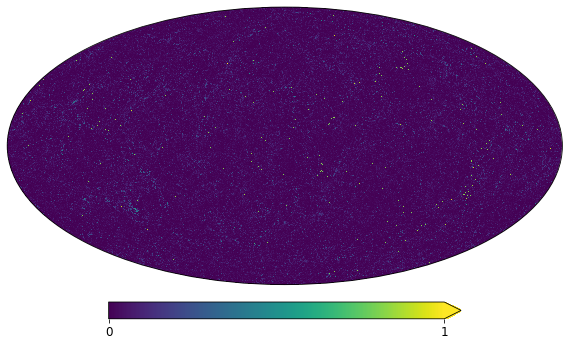

In [26]:
hp.newvisufunc.projview(convergence,max=1,xsize=3200);

In [27]:
psC = hp.sphtfunc.anafast(convergence)

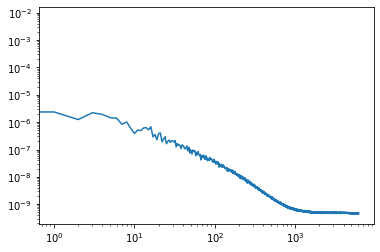

In [28]:
plt.loglog(psC)